In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

# Camera Calibration

In [2]:
##calculate object points
obj_pts = [] #3D points
img_pts = [] #2D points
objp = np.zeros((6*9,3),np.float32)
objp[:,:2]= np.mgrid[0:9,0:6].T.reshape(-1,2) #x,y coordinates
images = glob.glob('camera_cal/calibration*.jpg')
for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    if ret == True:
        obj_pts.append(objp)
        img_pts.append(corners)      

In [3]:
##helper function for camera calibration
def undistort(img):
    global obj_pts
    global img_pts
    global gray
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, gray.shape[::-1],None,None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)    
    return undist

#def undistort(frame):
#    frame_undistorted = cal_undistort(frame,obj_pts,img_pts)
#    return frame_undistorted

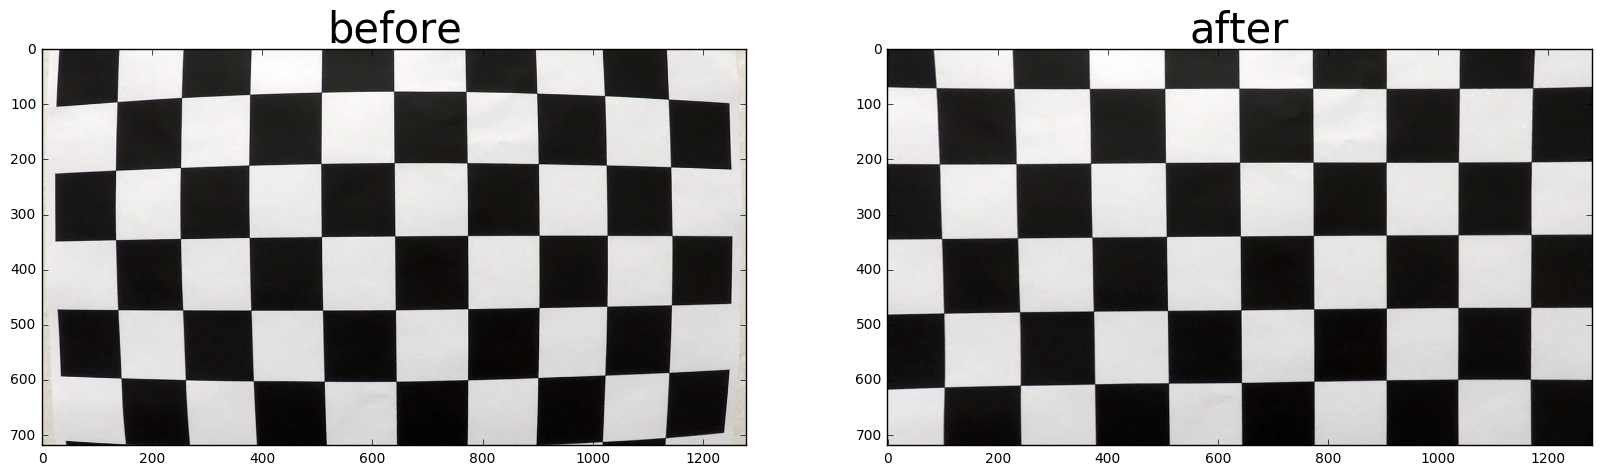

In [4]:
##test on image
img = mpimg.imread('camera_cal/calibration1.jpg')
img_undist = undistort(img)
                           
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('before', fontsize=30)
ax2.imshow(img_undist,cmap='gray')
ax2.set_title('after', fontsize=30)

In [5]:
##undistort project video
project_calibrated = 'project_calibrated.mp4'
clip1 = VideoFileClip("project_video.mp4")
output_clip = clip1.fl_image(undistort) #NOTE: this function expects color images!!
%time output_clip.write_videofile(project_calibrated, audio=False)
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_calibrated))

[MoviePy] >>>> Building video project_calibrated.mp4
[MoviePy] Writing video project_calibrated.mp4


100%|█████████▉| 1260/1261 [21:52<00:00,  1.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_calibrated.mp4 

CPU times: user 21min 45s, sys: 2.9 s, total: 21min 48s
Wall time: 21min 53s
